# 1. Instalación e importación de bibliotecas

In [2]:
!git clone https://github.com/angelfergar/ChurnRetention-SP.git

Cloning into 'ChurnRetention-SP'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 24 (delta 6), reused 11 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 1.26 MiB | 5.96 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [3]:
!pip install squarify

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [5]:
dataset_path = '/content/ChurnRetention-SP/data/raw_customerChurn.xlsx'
df = pd.read_excel(dataset_path)

# 2. Investiagación sobre el Dataset

Lo primero que haremos será obtener información sobre los datos contenidos en cada una de las columnas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Las conclusiones que obtenemos en este análisis inicial son:


1.    Apenas hay nulls en el dataset. La única columna que presenta valores nulos es Churn Reason
2.   Total Charges es una columna que debería contener valores numéricos y su dtype es object inicialmente
3. Revisando los valores contenidos en cada columna vemos que todos los datos de los clientes pertenecen a usuarios en el estado de California, Estados Unidos. Por esta razón, toda la información relacionada con su localización
no será relevante para este proyecto.
4. Como el objetivo de este proyecto es obtener los datos de Churn, se obviarán estas columnas, salvo Churn Label, que es nuestra etiqueta a la hora del modelado de machine learning, y Churn Reason, que la usaremos para tratar de sacar conclusiones sobre los abandonos de los clientes.






In [7]:
df.drop(columns=['CustomerID', 'Country', 'Count', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Lat Long', 'Churn Value', 'Churn Score', 'CLTV'], inplace=True)

## 2.1 Transformación de valores y eliminación de nulls

Una vez eliminadas las columnas irrelevantes, transformamos Total Charges en valor numérico para que sea coherente con el resto de columnas que contienen números.

In [8]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'] = df['Total Charges'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

Al transformar la columna de Total Charges a float se ha visto que, con el cambio, hay 11 registros nulos que no estaban previamente.

In [10]:
total_null = df['Total Charges'].isnull()
df[total_null]

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
2234,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,NaN
2438,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,NaN
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,NaN
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,NaN
2856,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,NaN
4331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,NaN
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,NaN
5104,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,NaN
5719,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,NaN
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,NaN


Haciendo una exploración de estos valores nulos se ve que todos los clientes que no tienen un valor de Total Charges están en su primer mes de contrato.


A pesar de tener un valor asignado en Monthly Charges, igualaremos sus Total Charges a 0, ya que no se ha llevado a cabo ningún cobro a su nombre aún.


In [11]:
df.fillna({'Total Charges':0}, inplace = True)

# 3. Análisis Exploratorio de datos

## 3.1 Grupos de columnas

Para la siguiente sección prepararemos una función que nos permitirá obtener el porcentaje de Churn que se vincula a los valores de cada columna. De esta forma podremos saber, por ejemplo, cuantos hombres están dados de alta o de baja, así como las mujeres que estén dadas de alta o de baja.

In [12]:
def churn_count(df, column):
  churn_data = {}
  churn_data['Retained'] = df[column].where(df['Churn Label'] == 'No').groupby(df[column]).count()
  churn_data['Churned'] = df[column].where(df['Churn Label'] == 'Yes').groupby(df[column]).count()
  return churn_data

### 3.1.1 Demografía

En esta sección nos centraremos en las columnas de Gender, Senior Citizen, Partner y Dependents.

Primero creamos una función que nos permitirá visualizar varias columnas en un subplot de Pie Charts.

In [13]:
def pie_churn_comparision_multiple(df, column, ax):

# Utilizamos la función de churn_count para conocer el porcentaje de Yes y No de cada columna a visualizar
  churn_data = churn_count(df, column)

  churn_no = churn_data['Retained']
  churn_yes = churn_data['Churned']

  attributes = df[column].unique()

  labels = [f'{attributes[0]} - Retained', f'{attributes[1]} - Retained', f'{attributes[0]} - Churned', f'{attributes[1]} - Churned']
  data = [churn_no[attributes[0]], churn_no[attributes[1]], churn_yes[attributes[0]], churn_yes[attributes[1]]]

  # Dividimos la información en secciones (anchura y ángulo) y texto para luego poder usar las anotaciones de cada sección
  slices, texts = ax.pie(data,wedgeprops=dict(width=0.5))

  # Establecemos la leyenda del plot
  ax.legend(slices, labels, title=column, loc="best", bbox_to_anchor=(1, 0, 0.5, 1.05))

  # Ponemos la información de las cajas y las uniones de las anotaciones
  text_box = dict(boxstyle="square,pad=0.5", fc="w")
  kw = dict(arrowprops=dict(arrowstyle="->"),
          bbox=text_box, va="baseline")

  # Añadimos las anotaciones para cada uno de los dos slices que tenemos
  for i, p in enumerate(slices):
  # Calculamos el porcentaje de cada sección
    percentage = data[i] / sum(data) * 100
    percentage_text = f'{percentage:1.1f}%'

  # Calculamos el ángulo de la sección para posicionar las anotaciones
    angle = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))
  # Elegimos cómo queremos alinear las anotaciones
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]

  # Añadimos un pequeño ángulo a las flechas con respecto a la posición de las secciones
    connectionstyle = f'angle,angleA=0,angleB={angle}'
    kw['arrowprops'].update({'connectionstyle': connectionstyle})

  # Mostramos las anotaciones y los porcentajes
    ax.annotate(f'{labels[i]}: {percentage_text}', xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

  ax.set_title(f'Churn Distribution by {column}')

Usamos esta función para visualizar todas las columnas que contienen información sobre la demografía de los clientes.

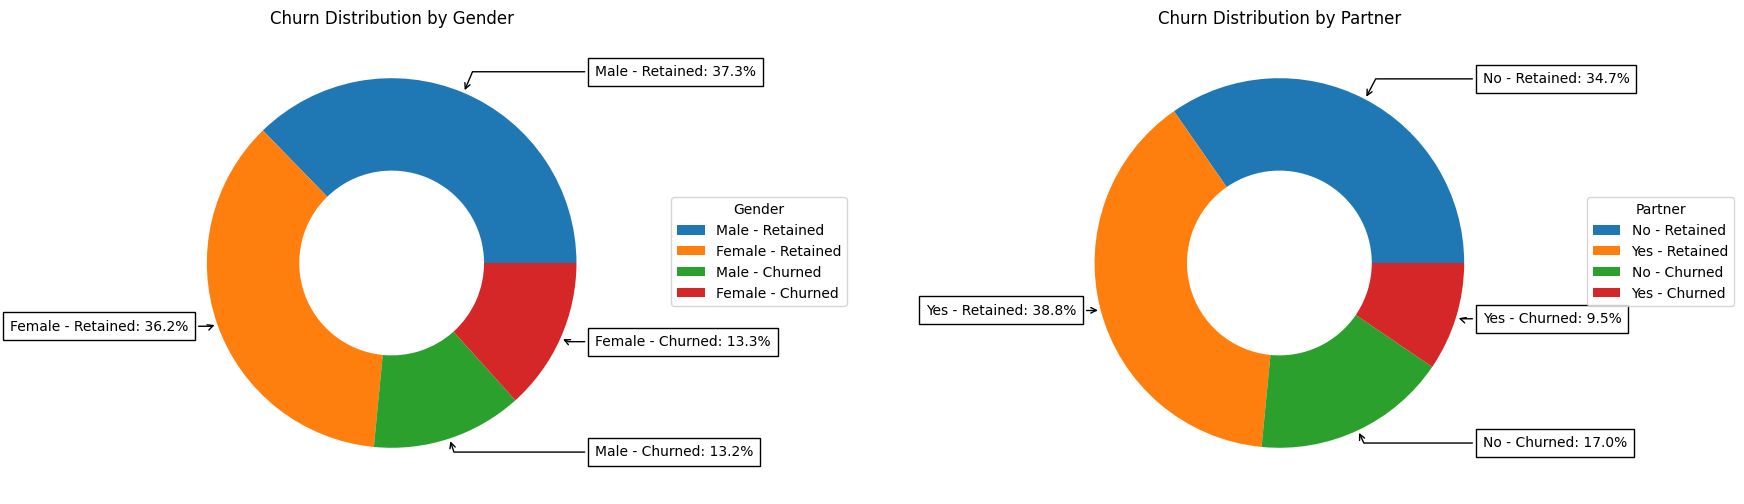

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(21,6))

columns = ['Gender', 'Partner']

for i,column in enumerate(columns):
  pie_churn_comparision_multiple(df,column, axes[i])

plt.show()

Viendo estos dos gráficos obtenemos que:



*   Las mujeres representan el 49,5% de nuestros clientes y los hombres el 50,5%. Viendo el gráfico podemos ver que **el género no representa un factor de peso** a la hora de medir el ratio de Churn, ya que los valores son casi iguales.

*   En el caso de los clientes con o sin pareja, vemos que el 51,7% de los usuarios no tienen pareja frente a un 48,3% que sí tiene. Si nos fijamos en el gráfico, veremos que **es más probable que los clientes sin pareja se den de baja**. Aún así, esta probabilidad es muy pequeña como para ser relevante.




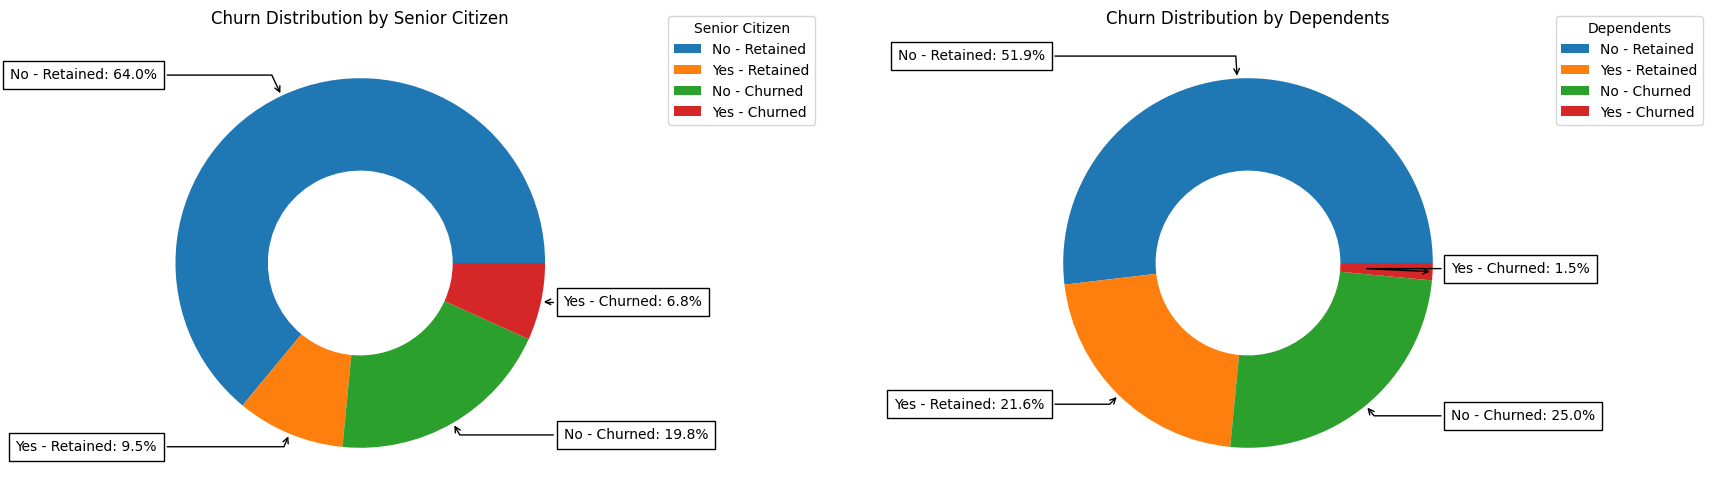

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(21,6))

columns = ['Senior Citizen', 'Dependents']

for i,column in enumerate(columns):
  pie_churn_comparision_multiple(df,column, axes[i])

plt.show()

De estos dos gráficos obtenemos que:


*   Los clientes por encima de 65 años representan una minoría de los clientes. A nivel proporcional vemos que **es más probable que un ciudadano senior se dé de baja.**

*   **Los usuarios sin dependencia tienen mucha más probabilidad de darse de baja** que aquellos que dependen de otras personas.




#### Conclusiones

El género y el contar con pareja no parecen ser factores relevantes en el abandono de clientes. Los ciudadanos mayores de 65 y aquellos clientes sin dependencia van asociados a una mayor probabilidad de baja.

### 3.1.2 Servicios

De la misma forma que se creó una función para hacer gráficos circulares para el grupo de demografía, se hará una función para representar gráficos de barras para las columnas de servicios y cuentas.

In [16]:
def bar_churn_comparision_multiple(df, column, ax):

  churn_data = churn_count(df, column)

  attributes = sorted(df[column].unique())
  churn_ratio = {'Retained':churn_data['Retained'], 'Churned':churn_data['Churned'], }

  x = np.arange(len(attributes))
  width = 0.25
  multiplier = 0

# Colocamos las etiquetas en el gráfico de barras
  for state, quantity in churn_ratio.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, quantity, width, label=state)
    ax.bar_label(rects, padding=0)
    multiplier += 1

  ax.set_ylabel('Quanitity')
  ax.set_title(f'Churn Distribution by {column}')
  ax.set_xticks(x + width, attributes)
  ax.legend(title = 'Churned',loc='best')

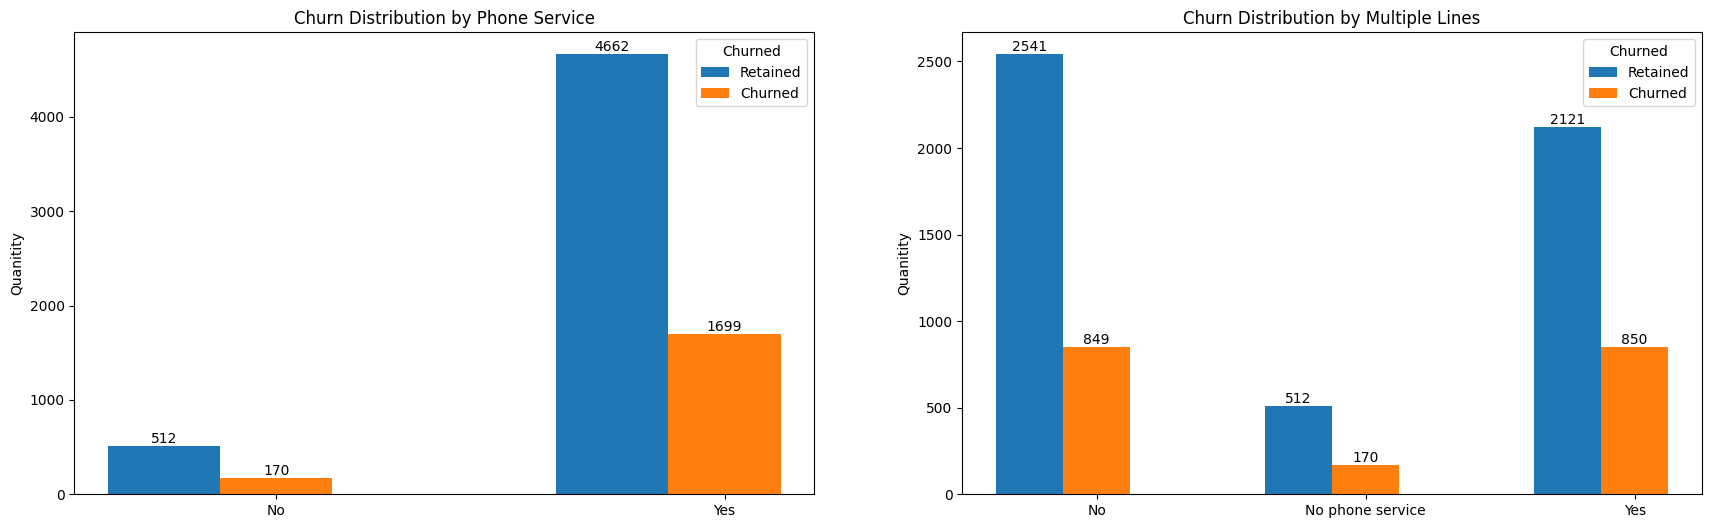

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(21, 6))

columns = ['Phone Service', 'Multiple Lines']

for i, column in enumerate(columns):
  bar_churn_comparision_multiple(df,column, axes[i])

plt.show()

Las conclusiones que sacamos de estos gráficos son:


*   Los clientes con línea telefónica representan la gran mayoría. **Cerca del 25% de los usuarios con línea telefónica se dan de baja.**

*   **Los clientes sin múltiples líneas de teléfono y los que no tienen servicio telefónico son menos propensos a darse de baja**, aunque la diferencia no llega a ser relevante.




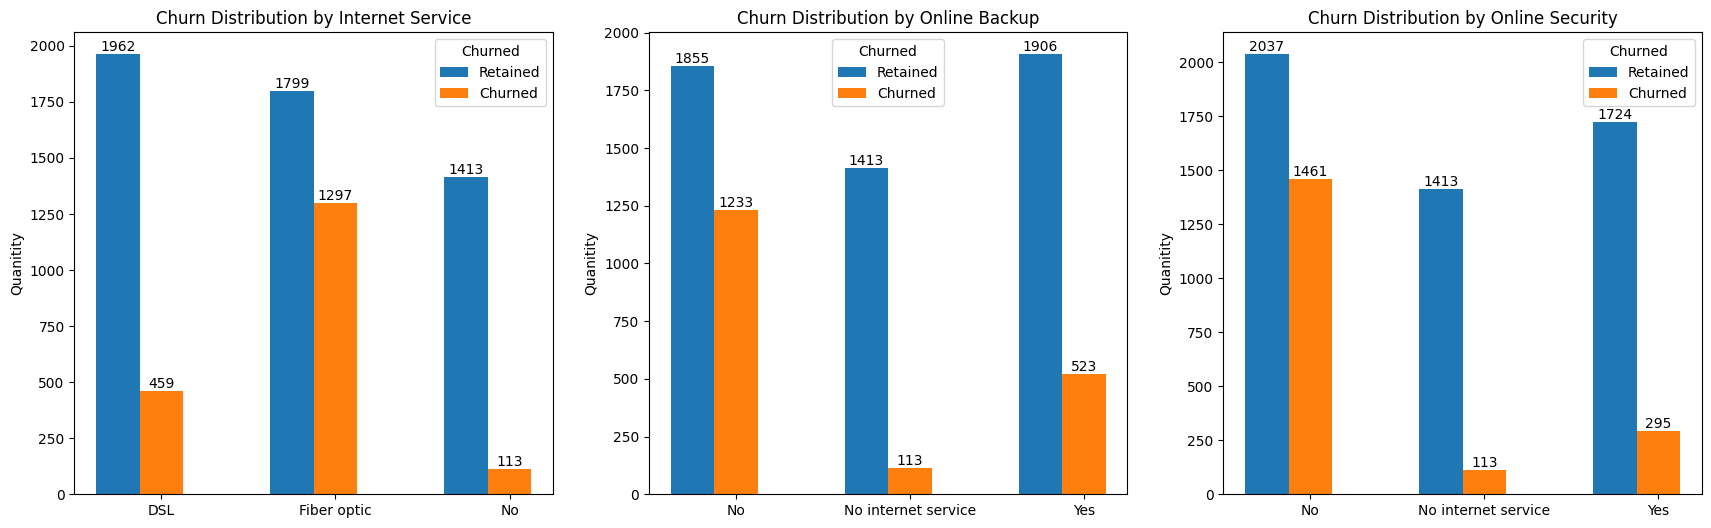

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

columns = ['Internet Service', 'Online Backup', 'Online Security']

for i, column in enumerate(columns):
  bar_churn_comparision_multiple(df,column, axes[i])

plt.show()

Viendo estos tres gráficos obtenemos que:


*   **Casi la mitad de clientes con fibra óptica contratada se dan de baja.** Esta variable se ha de tener en cuenta a la hora de revisar posibles soluciones a implementar para mejorar la fidelización de clientes, ya que parece una razón
principal de Churn entre los usuarios
*   De la misma forma, es bastante claro que **no contar con servicios de seguridad online o un backup suponen un riesgo mayor** a la hora de retener a los clientes.





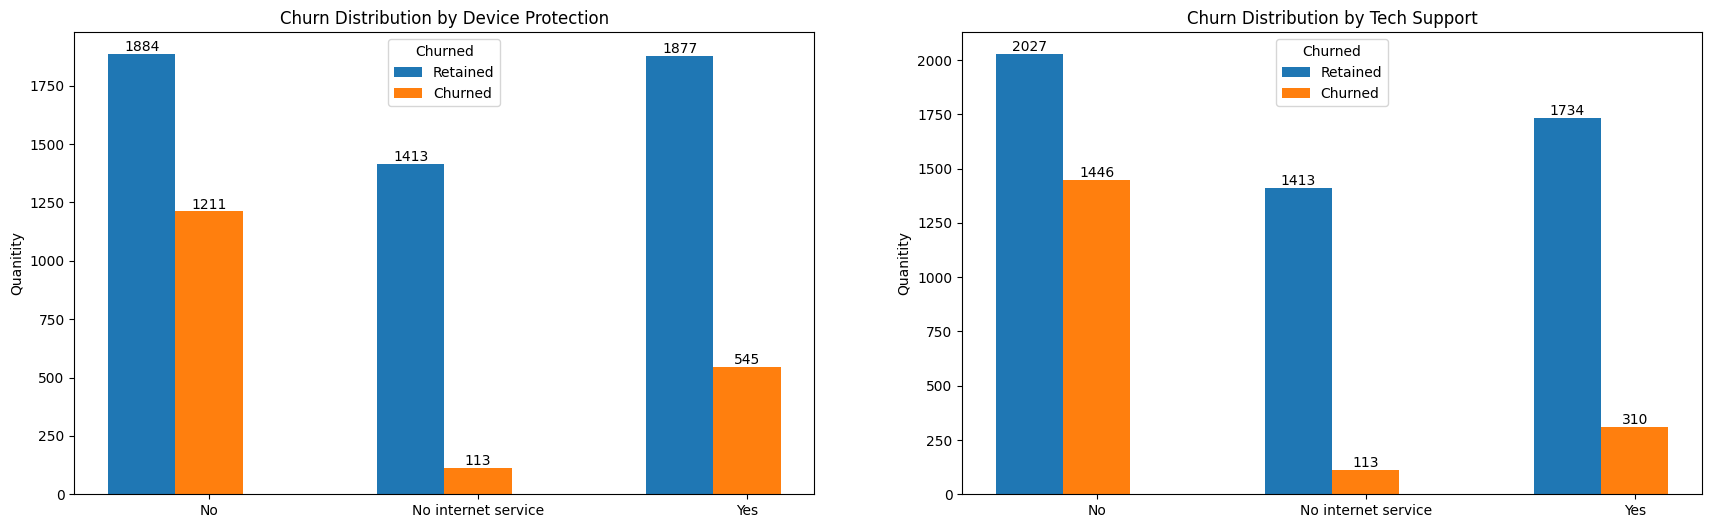

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(21, 6))

columns = ['Device Protection', 'Tech Support']

for i, column in enumerate(columns):
  bar_churn_comparision_multiple(df,column, axes[i])

plt.show()

De estos dos gráficos obtenemos que:


*   Al igual que vimos con los servicios de Internet, **los usuarios que no cuentan con estos suplementos son más propensos a darse de baja.**



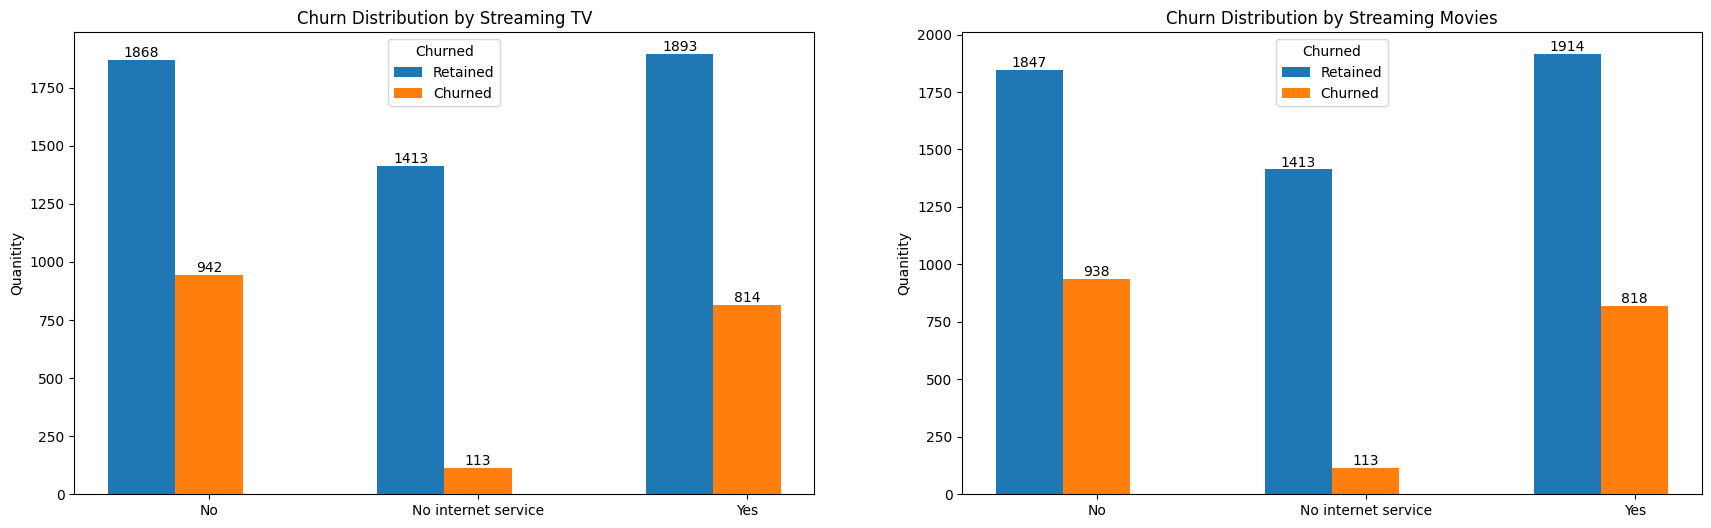

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(21, 6))

columns = ['Streaming TV', 'Streaming Movies']

for i, column in enumerate(columns):
  bar_churn_comparision_multiple(df,column, axes[i])

plt.show()

Las conclusiones que sacamos de estos gráficos son:


*   Que los clientes se den de baja es independiente a que cuenten o no con estos servicios.

*   **Los usuarios sin servicios de Internet son retenidos** en mayor cantidad.



#### Conclusiones

En general, los usuarios que no cuentan con un servicio de Internet presentan menor propensión a darse de baja. Por otro lado, los clientes con un Internet de fibra óptica suponen un problema a la hora de retener usuarios. Finalmente, parece que los servicios complementarios a contar con Internet son clave a la hora de mejorar la retención de los usuarios.

### 3.1.3 Pagos

A continuación nos centraremos en las columnas vinculadas a la información de los pagos de los clientes. Usaremos gráficos de barras para las categorías cualitativas, e histogramas para las columnas cuantitativas.

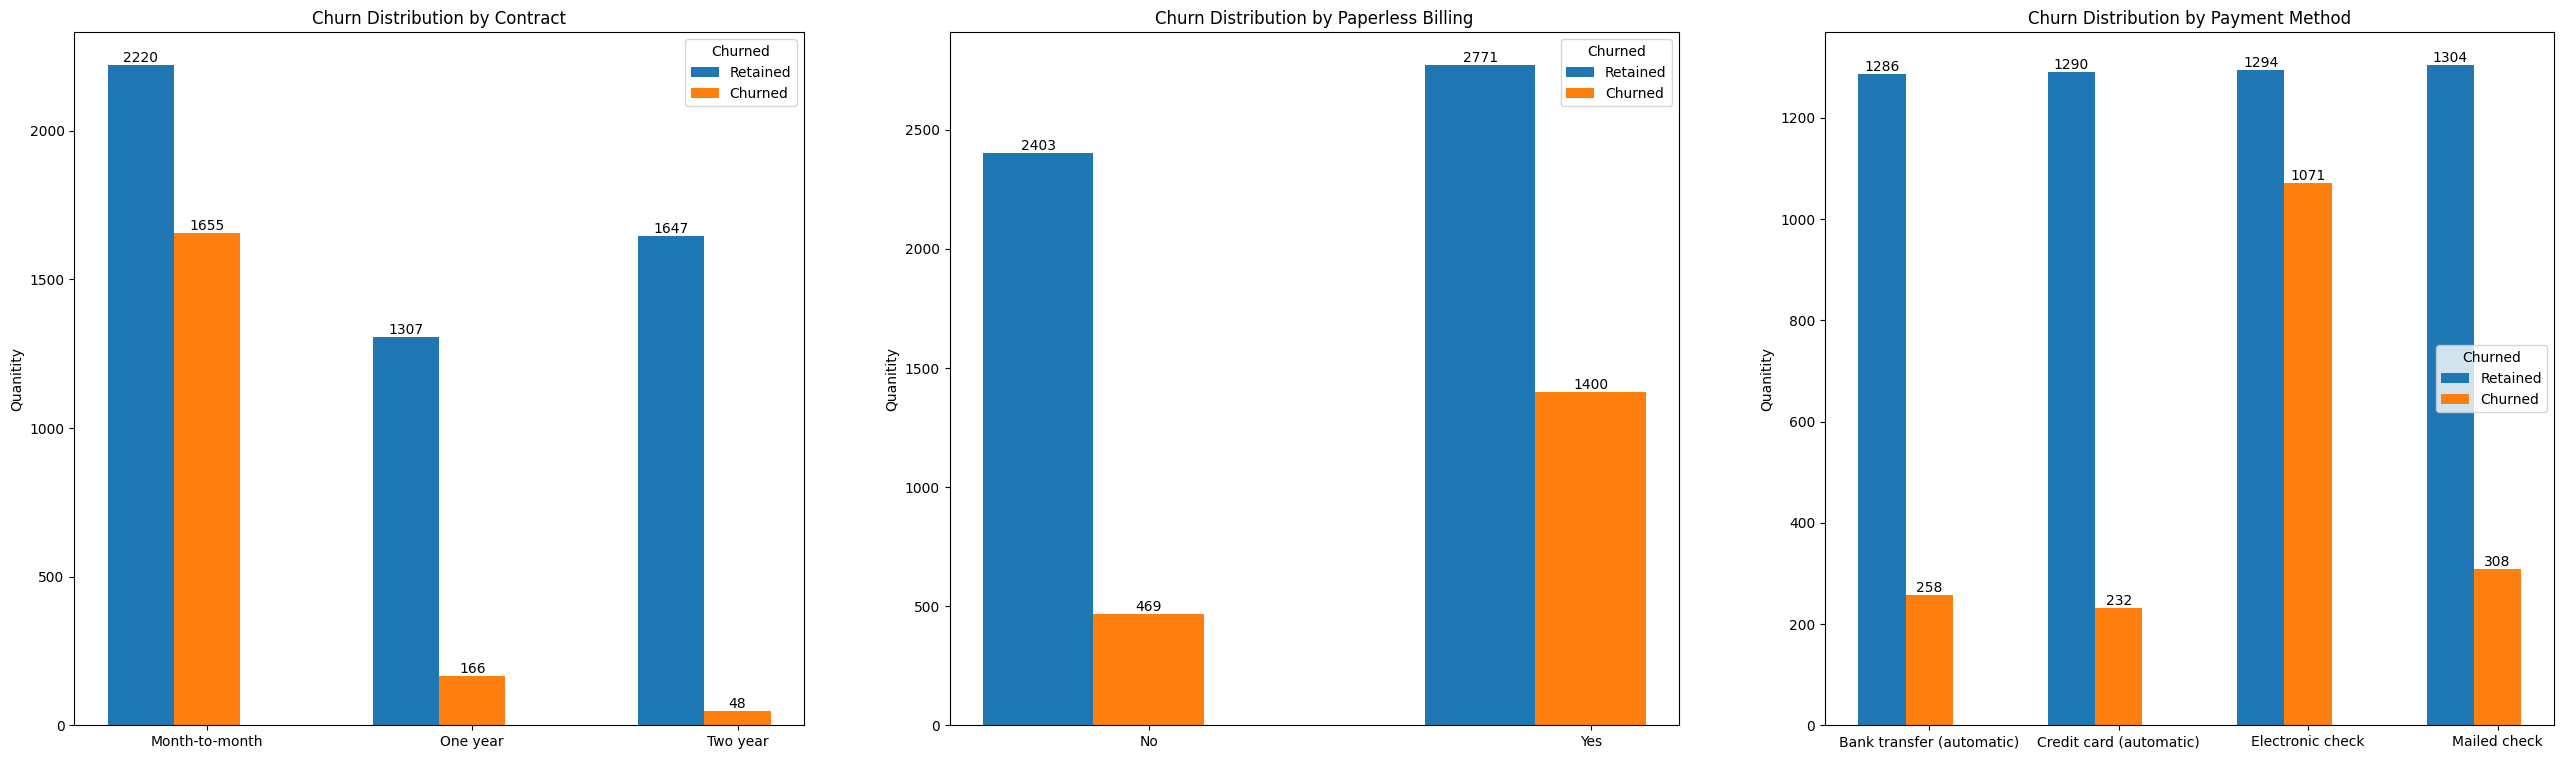

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(32, 9))

columns = ['Contract', 'Paperless Billing', 'Payment Method']

for i, column in enumerate(columns):
  bar_churn_comparision_multiple(df,column, axes[i])

plt.show()

Las principales conclusiones obtenidas de estos gráficos son las siguientes:


*   Los usuarios que realizan sus pagos mes a mes son mucho más reticentes a
mantenerse como clientes. **texto en negrita** Habría que indagar más, usando la información de las
columnas cuantitativas, para obtener una causa algo más clara de este problema.

*   **Un tercio de los clientes que realizan los pagos de forma electrónica se dan de baja.** Vemos que **la causa principal de esto se debe a aquellos usuarios que usan el método de Electronic Check**, el cual provoca que casi la mitad de usuarios que hacen uso de este servicio se den de baja.



In [22]:
# Creamos una función para comparar diferentes campos en un histograma, según si han sido retenidos o no en un
def hist_comparison(df, column):
  mask_retained = (df['Churn Label'] == 'No')
  mask_churned = (df['Churn Label'] == 'Yes')
  fig,ax = plt.subplots(figsize=(12,6))
  sns.kdeplot(df[column][mask_retained], fill =True, ax=ax)
  sns.kdeplot(df[column][mask_churned], fill =True, ax=ax)
  ax.legend(['Retained', 'Churned'])
  ax.set_title(f'Churn Distribution by {column}')
  plt.show()

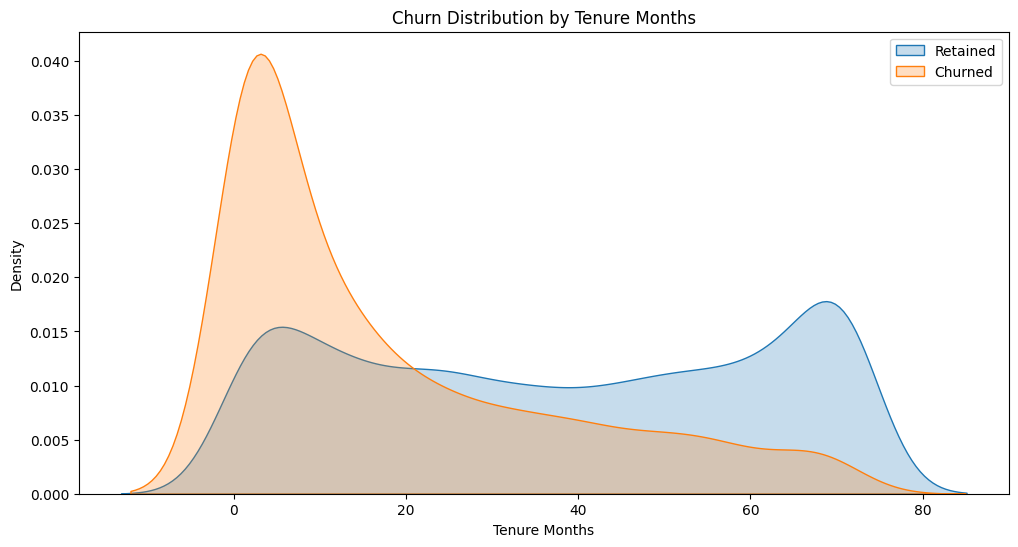

In [23]:
hist_comparison(df, 'Tenure Months')

Observamos que no hay una buena capacidad de retención sobre los nuevos clientes

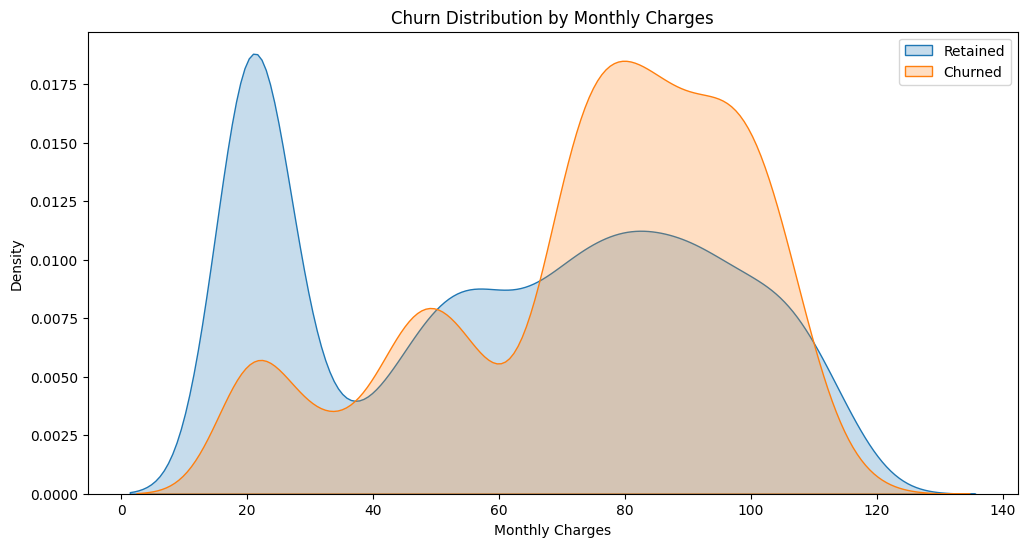

In [24]:
hist_comparison(df, 'Monthly Charges')

Cuanto mayor son los costes mensuales por cliente, mayor es la probabilidad de que estos se den de baja.

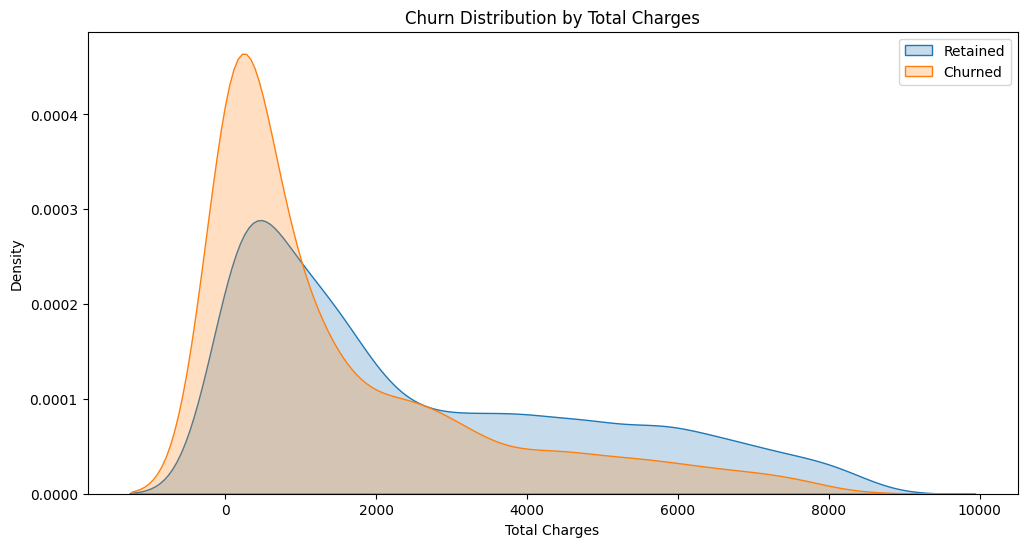

In [25]:
hist_comparison(df, 'Total Charges')

Este gráfico no muestra la información de una forma que sea clara para sacar conclusiones.
Habría que combinar los datos de varias columnas para obtener insights útiles con respecto a los datos presentados en Total Charges.

#### Conclusiones

Los contratos mensuales y el método de pago Electronic Check parecen ser factores críticos a la hora de que los clientes se den de baja. También vemos que los nuevos clientes y aquellos con costes mensuales altos presentan mayor riesgo de abandono.


Ahora vamos a indagar un poco más en las relaciones que existen entre los tipos de contrato y los meses de permanencia y los costes mensuales.

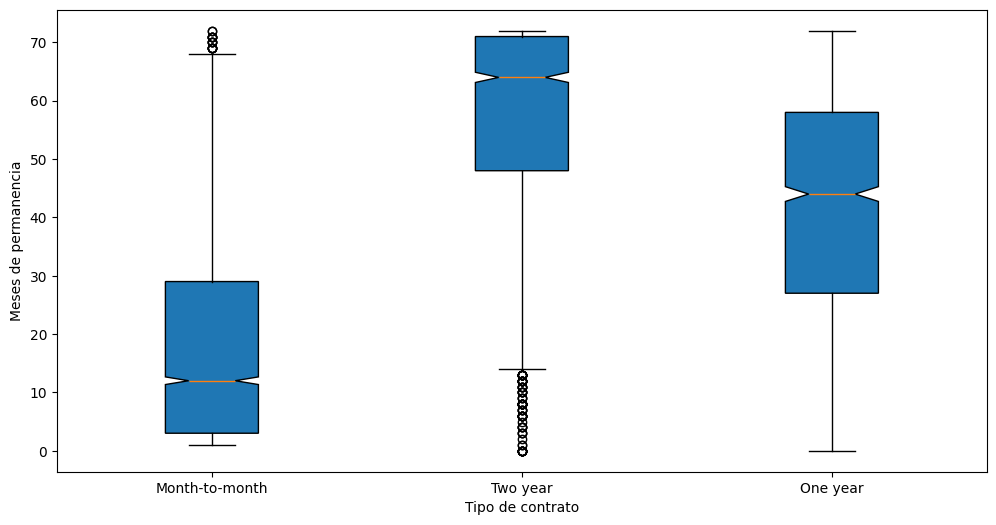

In [26]:
plt.figure(figsize=(12,6))
grouped_data = [df[df['Contract'] == contract]['Tenure Months'] for contract in df['Contract'].unique()]
plt.boxplot(grouped_data, patch_artist=True, notch=True, tick_labels=df['Contract'].unique())
plt.xlabel('Tipo de contrato')
plt.ylabel('Meses de permanencia')
plt.show()

Observamos que los contratos de dos años son los contratos que ofrecen una mayor
permanencia **texto en negrita**. También podemos ver en este gráfico que la causa de **que los nuevos clientes no tengan buena retención se debe a que optan por un contrato mes a mes.**


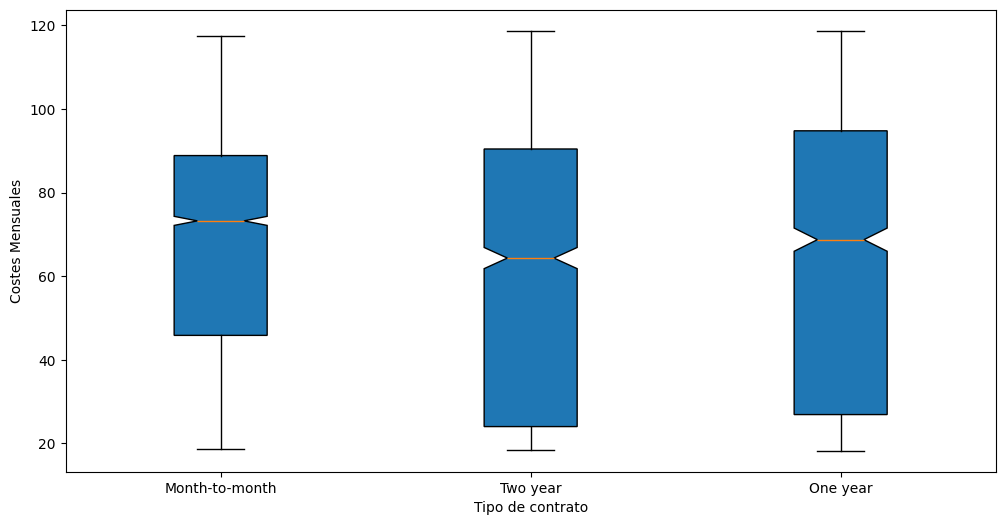

In [27]:
plt.figure(figsize=(12,6))
grouped_data = [df[df['Contract'] == contract]['Monthly Charges'] for contract in df['Contract'].unique()]
plt.boxplot(grouped_data, patch_artist=True, notch=True, tick_labels=df['Contract'].unique())
plt.xlabel('Tipo de contrato')
plt.ylabel('Costes Mensuales')
plt.show()

Los costes mensuales de los contratos de uno o dos años están más distribuídos. Por otro lado, se observa que **el promedio de los costes mensuales de los contratos mes a mes es superior al resto**, lo cual puede explicar que estos clientes se den de baja antes

<Axes: xlabel='Tenure Months', ylabel='Monthly Charges'>

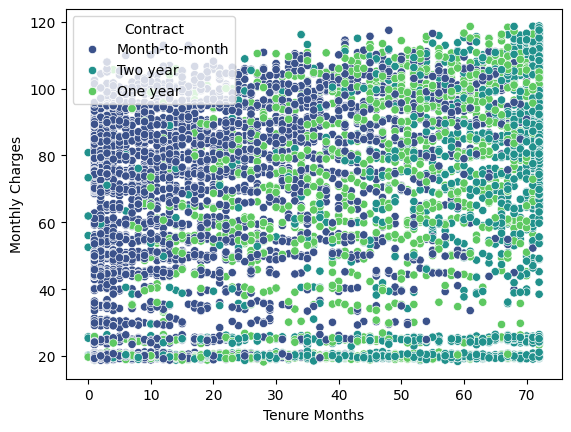

In [28]:
sns.scatterplot(data=df, x='Tenure Months', y='Monthly Charges', hue='Contract', palette='viridis')

Como comprobación final, confirmamos que existen usuarios con contratos por años que tienen, de forma consistente, menos costes mensuales a lo largo de su estancia como clientes, especialmente para aquellos que llevan menos tiempo dados de alta.

## 3.2 Churn Reason

A continuación vamos a visualizar la columna 'Churn Reason' para obtener más información acerca de las razones por las que los clientes eligen darse de baja.

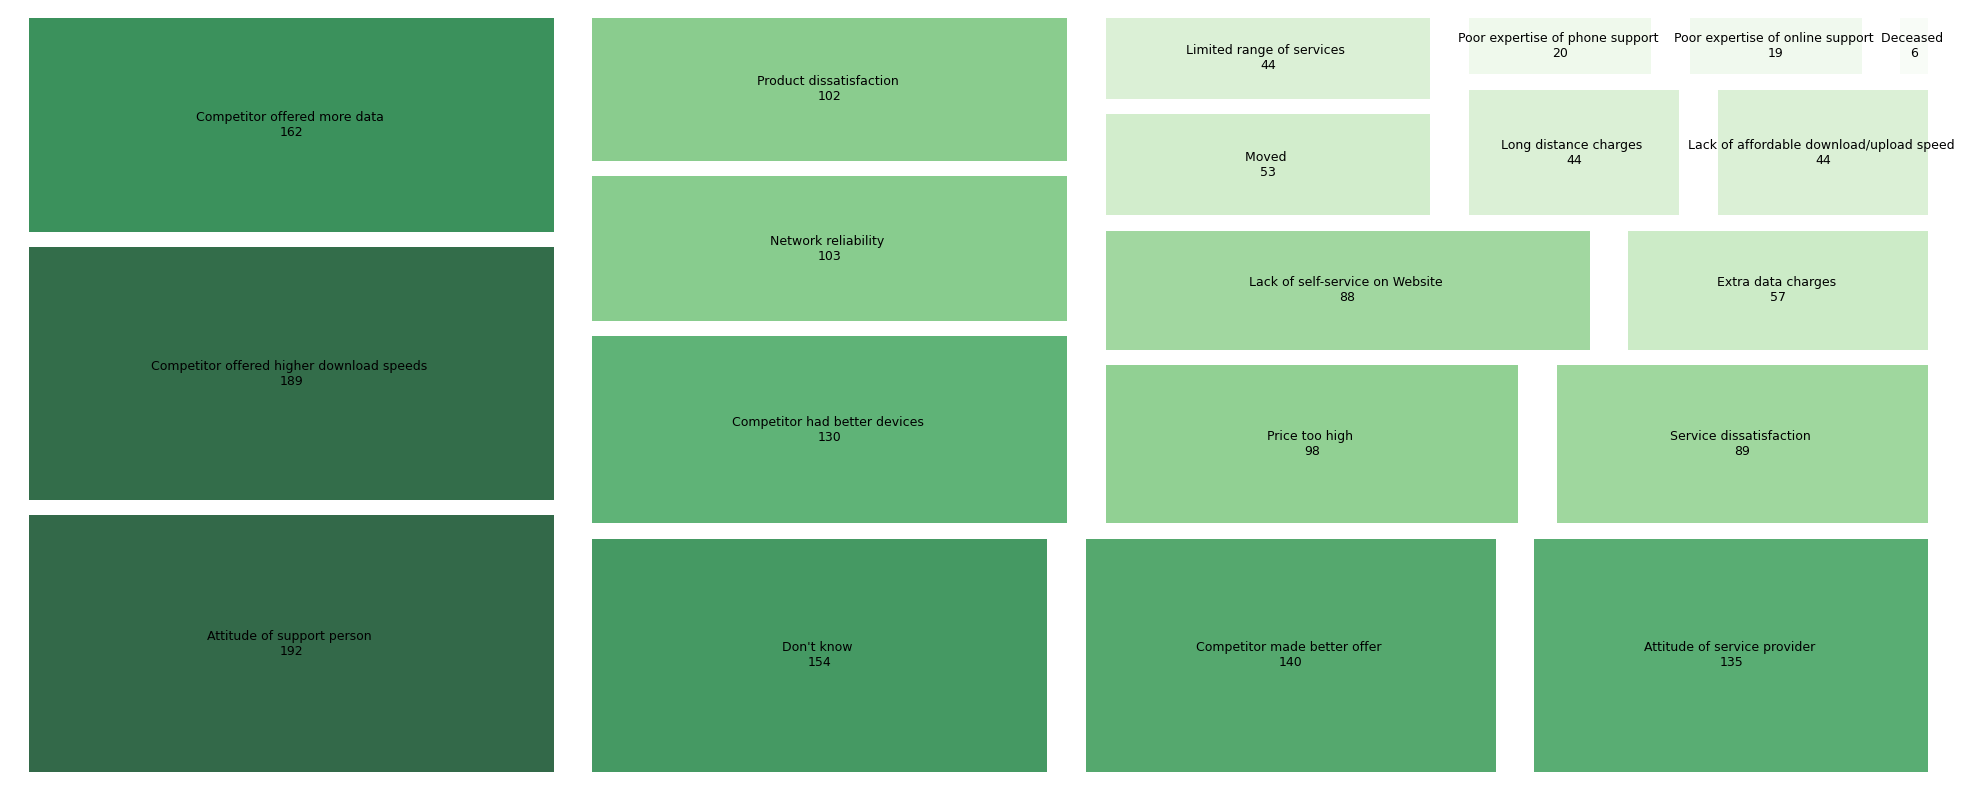

In [29]:
fig, ax = plt.subplots(figsize=(25, 10))

my_values = df['Churn Reason'].groupby(df['Churn Reason']).count().sort_values(ascending=False)
labels = [f'{index} \n{value}' for index,value in zip(my_values.index, my_values)]

# Creamos la paleta de colores
cmap = matplotlib.cm.Greens
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

# Personalizamos el gráfico
squarify.plot(sizes=df['Churn Reason'].value_counts(), label=labels, alpha=0.8, text_kwargs={'fontsize': 9}, pad=True, color=colors)
plt.axis('off')
plt.show()

Vemos que las principales razones de queja por parte de los usuarios son:


*   **Falta de profesionalidad del servicio técnico:** A pesar de que los usuarios que cuentan con Tech Support tienen un porcentaje de abandono relativamente bajo, los clientes son bastante vocales con respecto a los problemas asociados a la actitud y experiencia de los trabajadores de atención al cliente

*   **Falta de calidad de los productos con respecto a la competencia:** Se mencionan problemas de fiabilidad de la red, velocidades de descarga, mejores dispositivos y en general, una insatisfacción con los productos ofrecidos

*  **Falta de calidad de los productos con respecto a la competencia:** Se mencionan problemas de fiabilidad de la red, velocidades de descarga, mejores dispositivos y en general, una insatisfacción con los productos ofrecidos









En este punto, vamos a rellenar todos los nulls de Churn Reason y exportar el dataset para poder usarlo previamente en PowerBI y crear dashboards con toda la información obtenida en este EDA.

In [30]:
df['Churn Reason'] = df['Churn Reason'].fillna('N/A')

In [33]:
df.to_csv('/content/ChurnRetention-SP/data/clean_customerChurn.csv', index=False)

Subimos el Dataset a GitHub:

In [47]:
%cd /content/ChurnRetention-SP

/content/ChurnRetention-SP


In [48]:
!git add data/clean_customerChurn.csv

Se han eliminado las partes que requieren identificación

In [54]:
!git commit -m "Clean dataset updated"

On branch main
Your branch and 'origin/main' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

nothing to commit, working tree clean


In [58]:
!git push origin main

Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 105.92 KiB | 3.78 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/angelfergar/ChurnRetention-SP.git
   c2b2200..2d133bd  main -> main


Una vez tenemos la copia del dataset listo, borramos la columna Churn Reason para continuar con el resto del EDA.

In [59]:
df.drop(columns='Churn Reason', inplace=True)

## 3.3 Matriz de correlación

Para finalizar la exploración de los datos con diferentes técnicas de visualización, pasaremos el Data Frame por una matriz de correlación para observar qué variables están más relacionadas con el Churn

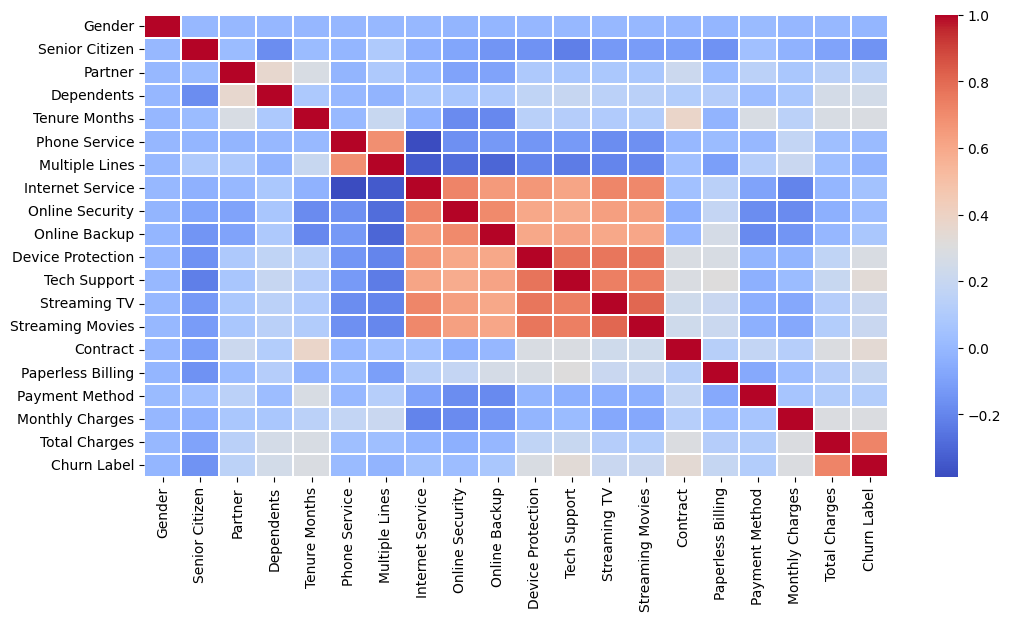

Churn Label          1.000000
Total Charges        0.917741
Contract             0.529932
Tenure Months        0.388430
Monthly Charges      0.377823
Dependents           0.358130
Tech Support         0.225261
Paperless Billing    0.204141
Device Protection    0.163257
Partner              0.163112
Streaming TV         0.086890
Payment Method       0.085650
Streaming Movies     0.084222
Online Backup       -0.045636
Internet Service    -0.052154
Online Security     -0.103003
Phone Service       -0.150967
Multiple Lines      -0.168301
Gender              -0.206165
Senior Citizen      -0.446429
Name: Churn Label, dtype: float64


In [60]:
plt.figure(figsize=(12, 6))
# Convertimos las columnas en valores numéricos para calcular la correlación
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="coolwarm")
plt.show()

correlations = corr.corr()['Churn Label'].sort_values(ascending=False)
print(correlations)



*   De nuevo, obtenemos que Total Charges, Contract, Tenure Months y Monthly Charges están a la cabeza a la hora de determinar si un cliente se dará o no de baja.

*   Otras variables consideradas clave como Paperless Billing o Dependents también salen entre los nombres más relacionados con el churn de los usuarios.

*   Aunque Tech Support y Device Protection no estaban entre las variables a
tener en cuenta durante la exploración inicial, al ver las razones de las bajas de los clientes hace que tenga sentido el alto grado de correlación con el churn.

*   Sorprende ver que Internet Service no guarda un alto nivel de relación con el churn según la matriz de correlación, ya que se observó que la fibra óptica conllevaba a la baja de casi la mitad de sus usuarios. La baja probabilidad de abandono de las otras dos opciones debe de influir en este resultado.

*   Senior Citizen es la variable con menor grado de correlación, a pesar de que los ciudadanos mayores de 65 años están vinculados a una alta probabilidad de baja. Seguramente, la falta de representación de este sector de la población hace que no sea un factor a tener en cuenta en este caso.








## 3.4 Conclusiones y recomendaciones

### 3.4.1. Calidad de los servicios

**Problema:**

Casi la mitad de los usuarios de fibra óptica se dan de baja de este servicio, probablemente debido a problemas con la velocidad de descarga y fiabilidad, así como servicios de la competencia que ofrecen una alternativa mejor.

Los servicios adicionales de soporte técnico, seguridad online y protección de dispositivos son factores que tienen un peso considerable a la hora de detectar las causas de abandono de los clientes. Las quejas por falta de calidad del soporte técnico y la experiencia del personal refuerzan la importancia de estos servicios en la retención.

**Medidas:**

Habría que tratar de identificar y resolver los problemas de velocidad y fiabilidad de la fibra óptica. Una vez se haya conseguido mejorar este servicio, sería buena idea invertir en campañas que destaquen las mejoras y las garantías.

Ofrecer descuentos o pruebas gratuítas de los servicios de Tech Support, Device Protection, Online Backup o Online Security ya que aquellos clientes que tienen contratados estos servicios complementarios tienen una menor probabilidad de darse de baja.


### 3.4.2 Contratos y costes

**Problema:**

Los nuevos clientes tienen tendencia a darse de baja de los servicios a lo largo de los primeros meses de contrato. Esto se debe principalmente a que la mayoría de los nuevos clientes optan por un contrato mes a mes, el cual tiene unos costes que los clientes consideran elevados. De la misma forma, contar con un contrato mes a mes, es más sencillo el poder cambiar de proveedor.

El método de pago Electronic Check es un problema crítico, ya que es el mayor factor asociado dentro los métodos de pago.

**Medidas:**

Por una parte, se podrían implementar programas de bienvenida con beneficios exclusivos durante los primeros meses para incrementar la permanencia de los clientes en los inicios de sus contratos. Se podría dar soporte personalizado a los clientes durante estos meses si se considerase necesario.

Incentivar los contratos anuales o bianuales mediante descuentos, promociones o regalos, ya que son los contratos que más permanencia ofrecen. Otra opción sería añadir descuentos automáticos basados en la antigüedad de los clientes o por pagos anticipados, fomentando así estos contratos por años también.

Mejorar la experiencia del pago con Electronic Check. Mientras se mejora este aspecto se pueden ofrecer promociones para otros métodos de pago electrónicos que tienen una tasa de abandono mucho menor.


### 3.4.3 Servicio técnico

**Problema:**

La actitud y la profesionalidad del servicio técnico es una razón muy sonada entre las quejas de los clientes a la hora de darse de baja de los servicios.

**Medidas:**

En relación a la parte humana, entrenar al personal para mejorar la calidad del servicio y la resolución de problemas.

Por otra parte, se pueden implementar servicios de self-service accesibles para los usuarios y que les permitan resolver ciertos problemas de forma rápida.


### 3.4.4 Conclusiones finales

Para mejorar la retención de los clientes se deben abordar los problemas de calidad de la fibra óptica, fomentar la contratación de servicios adicionales, implementar programas de bienvenida accesibles para los nuevos usuarios, e incentivar los contratos a largo plazo.
Además, se debe optimizar la experiencia con métodos de pago electrónicos y fortalecer el servicio de soporte técnico para garantizar una atención de calidad.